In [4]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Dig_Tickets_20240510.csv')
df

,DIG_TICKET#,PERMIT#,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,PRIMARYCONTACTFIRST,PRIMARYCONTACTLAST,LATITUDE,LONGITUDE
0,600391390,NaN,01/01/2018,True,445.0,445.0,W,95TH,ST,NaN,01/01/2018,01/06/2018,NaN,WATER MANAGEMENT (TONY),41.721458,-87.635337
1,600391391,DOT901961,01/01/2018,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",01/04/2018,01/30/2018,NaN,DWM,41.901572,-87.652297
2,600391392,NaN,01/01/2018,True,9124.0,9124.0,S,CREGIER,AVE,NaN,01/01/2018,01/06/2018,NaN,WATER MANAGEMENT,41.728893,-87.580533
3,600391393,DOT901964,01/01/2018,False,1536.0,1536.0,N,CAMPBELL,AVE,PARKWAY,01/04/2018,01/30/2018,NaN,DWM,41.909577,-87.689807
4,600391394,NaN,01/01/2018,True,3338.0,3338.0,W,60TH,ST,NaN,01/01/2018,01/06/2018,NaN,WATER MANAGEMENT (DAN),41.784475,-87.707277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106257,601543357,DOT1949525,05/09/2024,False,2459.0,2523.0,S,HOYNE,AVE,"ALLEY,CURBLANE,TRAFFIC,INTERSECT,PARKWAY,SIDEWALK",05/14/2024,06/06/2024,NaN,CDOT - In-House Construction,41.846763,-87.678001
1106258,601543358,DOT1949525,05/09/2024,False,2259.0,2401.0,S,HOYNE,AVE,"ALLEY,CURBLANE,TRAFFIC,INTERSECT,PARKWAY,SIDEWALK",05/14/2024,06/06/2024,NaN,CDOT - In-House Construction,41.849468,-87.678369
1106259,601543359,DOT1949525,05/09/2024,False,2359.0,2501.0,S,HOYNE,AVE,"ALLEY,CURBLANE,TRAFFIC,INTERSECT,PARKWAY,SIDEWALK",05/14/2024,06/06/2024,NaN,CDOT - In-House Construction,41.847652,-87.678321
1106260,601543360,DOT1949525,05/09/2024,False,2459.0,2525.0,S,HOYNE,AVE,"ALLEY,CURBLANE,TRAFFIC,INTERSECT,PARKWAY,SIDEWALK",05/14/2024,06/06/2024,NaN,CDOT - In-House Construction,41.846753,-87.678294


In [6]:
df.head(2)

,DIG_TICKET#,PERMIT#,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,PRIMARYCONTACTFIRST,PRIMARYCONTACTLAST,LATITUDE,LONGITUDE
0,600391390,NaN,01/01/2018,True,445.0,445.0,W,95TH,ST,NaN,01/01/2018,01/06/2018,NaN,WATER MANAGEMENT (TONY),41.721458,-87.635337
1,600391391,DOT901961,01/01/2018,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",01/04/2018,01/30/2018,NaN,DWM,41.901572,-87.652297


In [7]:
df.shape

(1106262, 16)

In [8]:
df.dtypes

DIG_TICKET#              int64
PERMIT#                 object
REQUESTDATE             object
EMERGENCY                 bool
STNOFROM               float64
STNOTO                 float64
DIRECTION               object
STNAME                  object
SUFFIX                  object
PLACEMENT               object
DIGDATE                 object
EXPIRATIONDATE          object
PRIMARYCONTACTFIRST     object
PRIMARYCONTACTLAST      object
LATITUDE               float64
LONGITUDE              float64
dtype: object

In [9]:
df.isna().sum() # requestdate and dig_ticket has no nulls 

DIG_TICKET#                  0
PERMIT#                 179476
REQUESTDATE                  0
EMERGENCY                    0
STNOFROM                     4
STNOTO                       6
DIRECTION                    0
STNAME                       0
SUFFIX                   11103
PLACEMENT               192545
DIGDATE                     41
EXPIRATIONDATE             344
PRIMARYCONTACTFIRST    1038732
PRIMARYCONTACTLAST           5
LATITUDE                  2574
LONGITUDE                 2574
dtype: int64

Step 1 : Pulling all excavation data for only valid permit number

In [10]:
df.dropna(subset=['PERMIT#'], inplace=True)

In [11]:
df.shape

(926786, 16)

In [12]:
df.isna().sum()

DIG_TICKET#                 0
PERMIT#                     0
REQUESTDATE                 0
EMERGENCY                   0
STNOFROM                    0
STNOTO                      2
DIRECTION                   0
STNAME                      0
SUFFIX                   7789
PLACEMENT               13069
DIGDATE                     0
EXPIRATIONDATE            307
PRIMARYCONTACTFIRST    926519
PRIMARYCONTACTLAST          0
LATITUDE                  485
LONGITUDE                 485
dtype: int64

Step 2 : Creating seperate column for year of the digdate and request

In [13]:
#Converting to datetime format
df['REQUESTDATE'] = pd.to_datetime(df['REQUESTDATE'])
df['DIGDATE'] = pd.to_datetime(df['DIGDATE'])
df['EXPIRATIONDATE'] = pd.to_datetime(df['EXPIRATIONDATE'])
#Addig columns for analysis
df['REQUESTDATE_Year'] = df['REQUESTDATE'].dt.year
df['DIGDATE_Year'] = df['DIGDATE'].dt.year
df['REQUEST_DIG_DIFF'] = (df['DIGDATE'] - df['REQUESTDATE']).dt.days+1
df['DIG_EXPIRATION_DIFF'] = (df['EXPIRATIONDATE'] - df['DIGDATE']).dt.days+1

In [14]:
df.head(2)

,DIG_TICKET#,PERMIT#,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,DIGDATE,EXPIRATIONDATE,PRIMARYCONTACTFIRST,PRIMARYCONTACTLAST,LATITUDE,LONGITUDE,REQUESTDATE_Year,DIGDATE_Year,REQUEST_DIG_DIFF,DIG_EXPIRATION_DIFF
1,600391391,DOT901961,2018-01-01,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",2018-01-04,2018-01-30,NaN,DWM,41.901572,-87.652297,2018,2018,4,27.0
3,600391393,DOT901964,2018-01-01,False,1536.0,1536.0,N,CAMPBELL,AVE,PARKWAY,2018-01-04,2018-01-30,NaN,DWM,41.909577,-87.689807,2018,2018,4,27.0


Check min and max of years and differences 

In [15]:
min_max_values = df[['REQUESTDATE_Year', 'DIGDATE_Year', 'REQUEST_DIG_DIFF', 'DIG_EXPIRATION_DIFF']].agg([min, max])
print(min_max_values)

     REQUESTDATE_Year  DIGDATE_Year  REQUEST_DIG_DIFF  DIG_EXPIRATION_DIFF
min              2018          2018                 1                 -6.0
max              2024          2024               743                397.0


Checking how many differences have a negative 

In [16]:
count_negative_diff = (df['EXPIRATIONDATE'] < df['DIGDATE']).sum()
print("Number of values < 0 in DIG_EXPIRATION_DIFF column:", count_negative_diff)

Number of values < 0 in DIG_EXPIRATION_DIFF column: 2


In [17]:
filtered_df = df[df['EXPIRATIONDATE'] < df['DIGDATE']][['REQUESTDATE','DIGDATE', 'EXPIRATIONDATE', 'DIG_EXPIRATION_DIFF']]
print(filtered_df)

       REQUESTDATE    DIGDATE EXPIRATIONDATE  DIG_EXPIRATION_DIFF
210540  2019-03-13 2019-03-25     2019-03-18                 -6.0
509282  2020-11-30 2020-12-16     2020-12-15                  0.0


Lets remove cases where dig date is post expiry as it does not make sense

In [18]:
# Filter out records where 'EXPIRATIONDATE' is less than 'DIGDATE'
df = df[~(df['EXPIRATIONDATE'] < df['DIGDATE'])]

In [19]:
df.shape

(926784, 20)

check count duplicates for permit and DIG_TICKET

In [20]:
permit_duplicates = df.duplicated(subset=['PERMIT#']).sum()

# Count duplicates for 'DIG_TICKET#' column
dig_ticket_duplicates = df.duplicated(subset=['DIG_TICKET#']).sum()

print("Count of duplicates for permit#: ", permit_duplicates)
print("Count of duplicates for DIG_TICKET#: ", dig_ticket_duplicates)

Count of duplicates for permit#:  634390
Count of duplicates for DIG_TICKET#:  0


In [21]:
duplicate_permit_records = df[df.duplicated(subset=['PERMIT#'], keep=False)]

# Select specific columns
columns_to_display = ['DIG_TICKET#', 'PERMIT#', 'REQUESTDATE', 'DIGDATE', 'EXPIRATIONDATE']
duplicate_permit_records_selected = duplicate_permit_records[columns_to_display]

# Sort the duplicate records by 'permit#' column
duplicate_permit_records_sorted = duplicate_permit_records_selected.sort_values(by='PERMIT#')

print("Duplicate records based on 'permit#' column, ordered by 'permit#':")
print(duplicate_permit_records_sorted.head(10))

Duplicate records based on 'permit#' column, ordered by 'permit#':
        DIG_TICKET#     PERMIT# REQUESTDATE    DIGDATE EXPIRATIONDATE
122528    600517215  DOT1000004  2018-08-28 2018-08-30     2018-09-25
123033    600517727  DOT1000004  2018-08-29 2018-08-31     2018-09-26
141859    600537172  DOT1000005  2018-10-01 2018-10-04     2018-10-19
201675    600598915  DOT1000005  2019-02-19 2019-02-21     2019-03-08
192191    600589161  DOT1000005  2019-01-21 2019-01-23     2019-02-16
123034    600517728  DOT1000008  2018-08-29 2018-09-26     2018-10-22
122530    600517217  DOT1000008  2018-08-28 2018-08-30     2018-09-25
121379    600516049  DOT1000010  2018-08-27 2018-09-07     2018-09-28
121380    600516050  DOT1000010  2018-08-27 2018-09-07     2018-09-28
123858    600518574  DOT1000012  2018-08-30 2018-09-04     2018-09-26


Checking frequency of excavations each year 

In [22]:
permit_count_01 = df.groupby('REQUESTDATE_Year')['DIG_TICKET#'].count().sort_values(ascending=True).reset_index().rename(columns={'REQUESTDATE_Year': 'Year', 'DIG_TICKET#': 'Ticket_Count'})
permit_count_01

,Year,Ticket_Count
0,2024,47485
1,2020,126395
2,2022,133672
3,2021,148537
4,2019,151425
5,2018,155523
6,2023,163747


In [23]:
tot_permit_count = permit_count_01['Ticket_Count'].sum()
permit_count_01['Permit_Count_Percentage'] = round((permit_count_01['Ticket_Count'] / tot_permit_count) * 100,2)
permit_count_01

,Year,Ticket_Count,Permit_Count_Percentage
0,2024,47485,5.12
1,2020,126395,13.64
2,2022,133672,14.42
3,2021,148537,16.03
4,2019,151425,16.34
5,2018,155523,16.78
6,2023,163747,17.67


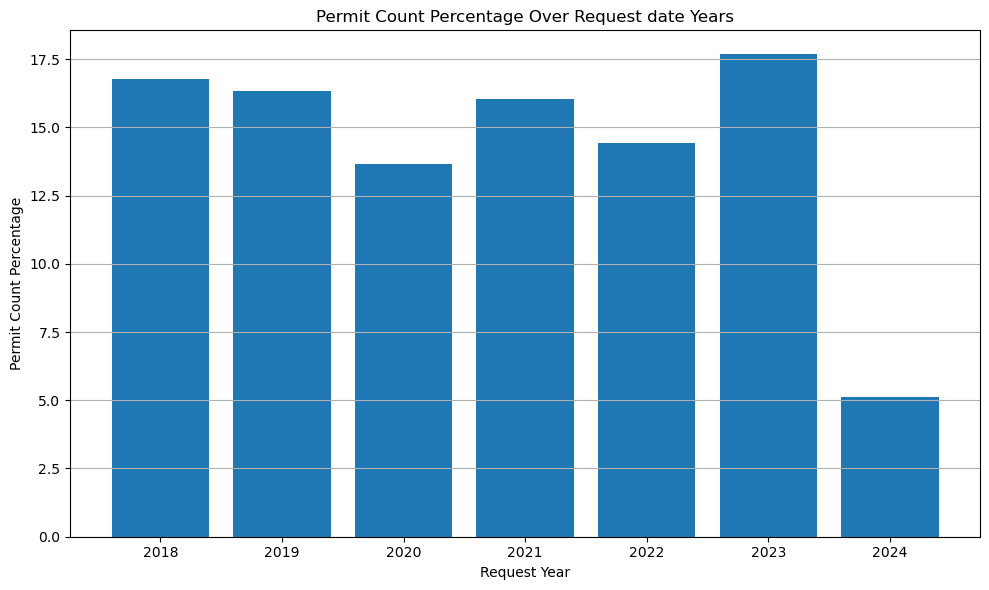

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(permit_count_01['Year'], permit_count_01['Permit_Count_Percentage'])
plt.title('Permit Count Percentage Over Request date Years')
plt.xlabel('Request Year')
plt.ylabel('Permit Count Percentage')
plt.grid(axis='y')
plt.xticks(permit_count_01['Year'])  # Set x-axis ticks to match the years
plt.tight_layout()
plt.show()

In [25]:
permit_count_02 = df.groupby('DIGDATE_Year')['DIG_TICKET#'].count().sort_values(ascending=True).reset_index().rename(columns={'DIGDATE_Year': 'Year', 'DIG_TICKET#': 'Ticket_Count'})
permit_count_02

,Year,Ticket_Count
0,2024,48486
1,2020,127121
2,2022,134108
3,2021,147449
4,2019,152563
5,2018,152953
6,2023,164104


In [26]:
tot_permit_count_02 = permit_count_02['Ticket_Count'].sum()
permit_count_02['Permit_Count_Percentage'] = round((permit_count_02['Ticket_Count'] / tot_permit_count_02) * 100,2)
permit_count_02

,Year,Ticket_Count,Permit_Count_Percentage
0,2024,48486,5.23
1,2020,127121,13.72
2,2022,134108,14.47
3,2021,147449,15.91
4,2019,152563,16.46
5,2018,152953,16.50
6,2023,164104,17.71


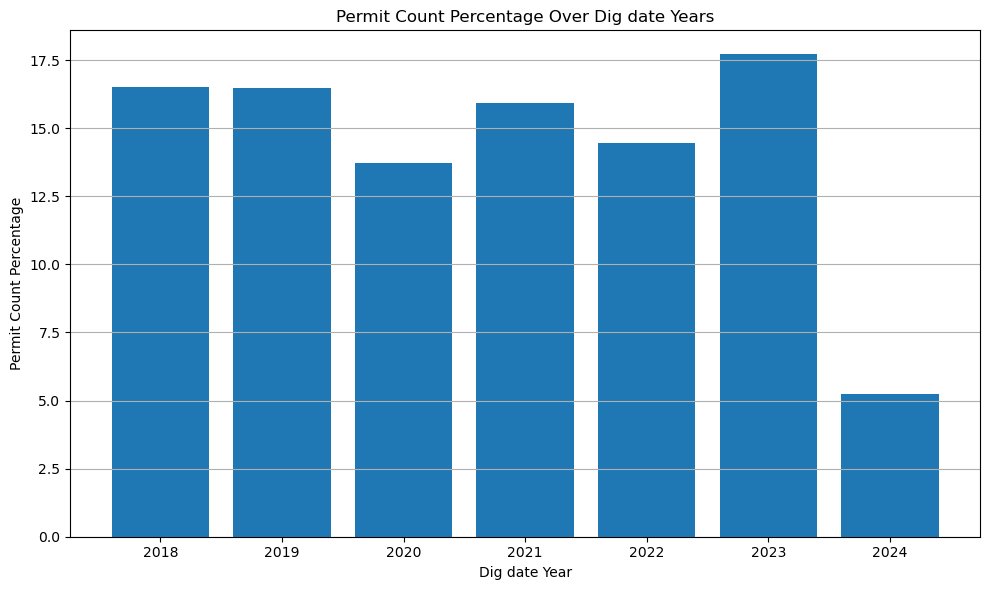

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(permit_count_02['Year'], permit_count_02['Permit_Count_Percentage'])
plt.title('Permit Count Percentage Over Dig date Years')
plt.xlabel('Dig date Year')
plt.ylabel('Permit Count Percentage')
plt.grid(axis='y')
plt.xticks(permit_count_02['Year'])  # Set x-axis ticks to match the years
plt.tight_layout()
plt.show()

In [28]:
df_unique_permits = df.drop_duplicates(subset=['PERMIT#'])

Exploring Placement 

In [29]:
# Flatten the 'id' column into a list
plc_list = df['PLACEMENT'].str.split(',').explode().tolist()

# Convert list to a set to remove duplicates, then back to a list to maintain order
unique_plc = list(set(plc_list))

print(unique_plc)

['PARKWAY', 'ADARAMP', 'ALLEY', 'TRAFFIC', nan, 'BIKELANE', 'NA', 'SIDEWALK', 'CURBLANE', 'CURBS', 'INTERSECT']


In [34]:
words_to_check = ['TRAFFIC', 'ADARAMP', 'CURBS', 'INTERSECT', 'SIDEWALK', 'ALLEY', 'BIKELANE', 'PARKWAY', 'CURBLANE']

# Create flag columns for each word
for word in words_to_check:
    df[f'{word.lower()}_flag'] = df['PLACEMENT'].str.contains(word, na=False).astype(int)


C:\Users\meetp\AppData\Local\Temp\ipykernel_16052\3547562847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{word.lower()}_flag'] = df['PLACEMENT'].str.contains(word, na=False).astype(int)
C:\Users\meetp\AppData\Local\Temp\ipykernel_16052\3547562847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{word.lower()}_flag'] = df['PLACEMENT'].str.contains(word, na=False).astype(int)
C:\Users\meetp\AppData\Local\Temp\ipykernel_16052\3547562847.py:5: SettingWithCopyWarning: 
A value is trying to b

In [35]:
df.head(5)

,DIG_TICKET#,PERMIT#,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,...,DIG_EXPIRATION_DIFF,traffic_flag,adaramp_flag,curbs_flag,intersect_flag,sidewalk_flag,alley_flag,bikelane_flag,parkway_flag,curblane_flag
1,600391391,DOT901961,2018-01-01,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",...,27.0,1,0,0,0,1,0,0,1,1
3,600391393,DOT901964,2018-01-01,False,1536.0,1536.0,N,CAMPBELL,AVE,PARKWAY,...,27.0,0,0,0,0,0,0,0,1,0
5,600391395,DOT901967,2018-01-01,False,5940.0,5940.0,N,RICHMOND,ST,PARKWAY,...,27.0,0,0,0,0,0,0,0,1,0
6,600391396,DOT901968,2018-01-01,False,4946.0,4946.0,W,POTOMAC,AVE,PARKWAY,...,27.0,0,0,0,0,0,0,0,1,0
7,600391397,DOT901969,2018-01-01,False,10047.0,10047.0,S,MORGAN,ST,PARKWAY,...,27.0,0,0,0,0,0,0,0,1,0


Checking areas more prone to excavation

In [36]:
flag_counts = df.groupby('DIGDATE_Year').agg({
    'traffic_flag': 'sum',
    'adaramp_flag': 'sum',
    'curbs_flag': 'sum',
    'intersect_flag': 'sum',
    'sidewalk_flag': 'sum',
    'alley_flag': 'sum',
    'bikelane_flag': 'sum',
    'parkway_flag': 'sum',
    'curblane_flag': 'sum'
}).reset_index()

flag_counts

,DIGDATE_Year,traffic_flag,adaramp_flag,curbs_flag,intersect_flag,sidewalk_flag,alley_flag,bikelane_flag,parkway_flag,curblane_flag
0,2018,90415,5504,9438,41922,107404,25276,3560,112822,95266
1,2019,85056,6014,9465,29230,110113,35254,3263,116362,90047
2,2020,64538,7914,9018,21378,86854,23342,3759,91607,64655
3,2021,89015,8026,9762,24998,108520,35247,7597,115499,87921
4,2022,80765,6369,8638,17771,94956,23929,5845,103489,81994
5,2023,81663,1253,2725,8379,97238,17304,3060,118954,92105
6,2024,27481,335,761,2010,31688,4661,518,34645,29005


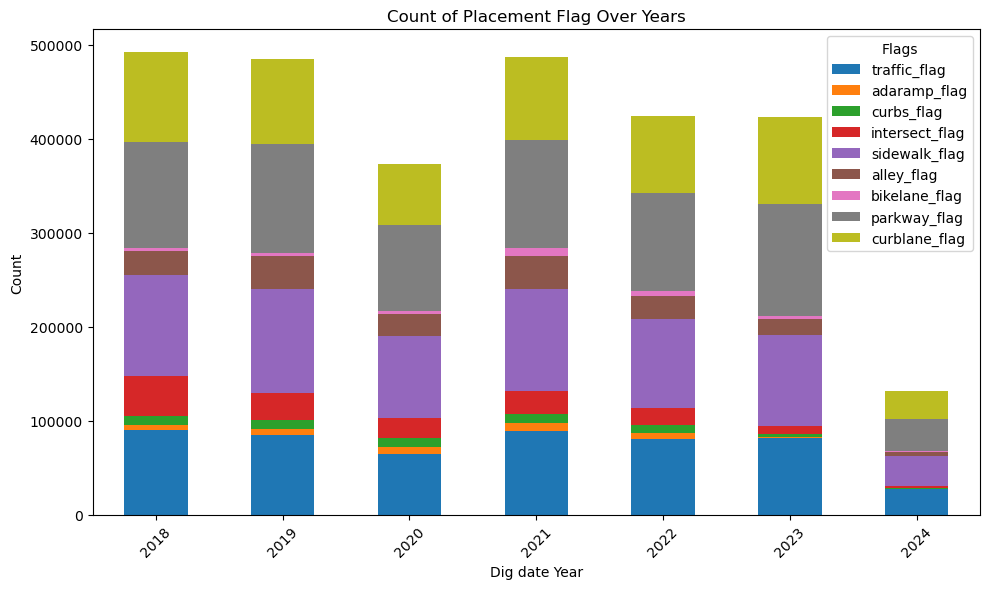

In [37]:
# Set the 'DIGDATE_Year' column as the index for plotting
flag_counts.set_index('DIGDATE_Year', inplace=True)

# Plotting
flag_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Count of Placement Flag Over Years')
plt.xlabel('Dig date Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Flags')  # Add legend with title

# Show plot
plt.tight_layout()
plt.show()

Checking emergency cases over the years

In [38]:
flag_counts_emer = df.groupby(['DIGDATE_Year', 'EMERGENCY'])['DIGDATE'].count().reset_index()

flag_counts_emer_fnl=flag_counts_emer[flag_counts_emer['EMERGENCY']==True].reset_index().rename(columns={'DIGDATE_Year': 'Year', 'DIGDATE': 'Count'})
flag_counts_emer_fnl

,index,Year,EMERGENCY,Count
0,1,2018,True,50
1,3,2019,True,104
2,5,2020,True,143
3,7,2021,True,194
4,9,2022,True,245
5,11,2023,True,249
6,13,2024,True,89


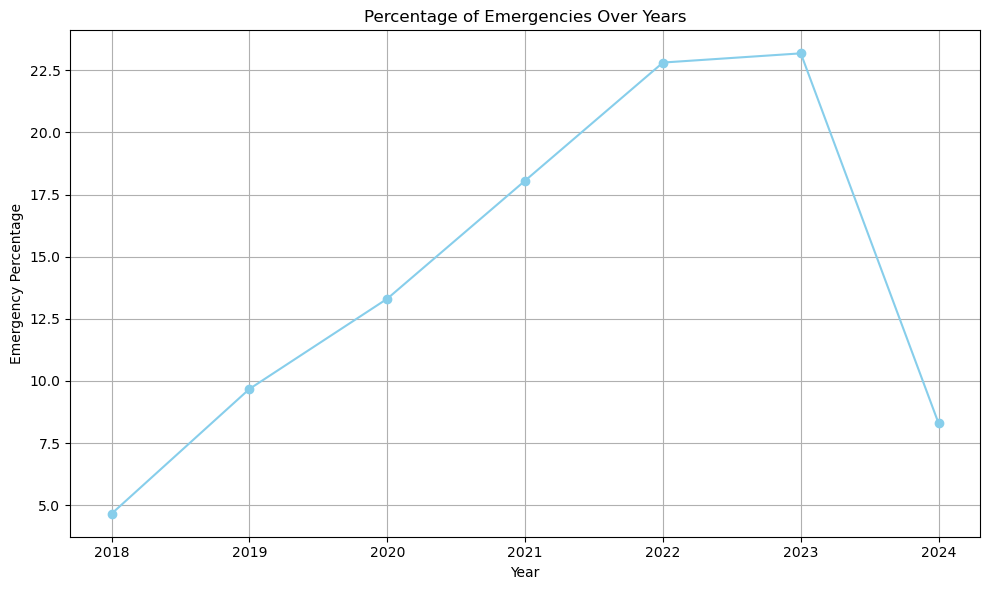

In [39]:
total_emergencies = flag_counts_emer_fnl['Count'].sum()

# Calculate the percentage of emergencies for each year
flag_counts_emer_fnl['Emergency_Percentage'] = round((flag_counts_emer_fnl['Count'] / total_emergencies) * 100,2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(flag_counts_emer_fnl['Year'], flag_counts_emer_fnl['Emergency_Percentage'], marker='o', color='skyblue')
plt.title('Percentage of Emergencies Over Years')
plt.xlabel('Year')
plt.ylabel('Emergency Percentage')
plt.grid(True)
plt.xticks(flag_counts_emer_fnl['Year'])  # Set x-axis ticks to match the years
plt.tight_layout()
plt.show()

In [40]:
flag_counts_emer_fnl

,index,Year,EMERGENCY,Count,Emergency_Percentage
0,1,2018,True,50,4.66
1,3,2019,True,104,9.68
2,5,2020,True,143,13.31
3,7,2021,True,194,18.06
4,9,2022,True,245,22.81
5,11,2023,True,249,23.18
6,13,2024,True,89,8.29


Checking which placement has higher emergency cases over the years

In [43]:
flag_counts_emer = df.groupby(['DIGDATE_Year', 'EMERGENCY']).agg({
    'traffic_flag': 'sum',
    'adaramp_flag': 'sum',
    'curbs_flag': 'sum',
    'intersect_flag': 'sum',
    'sidewalk_flag': 'sum',
    'alley_flag': 'sum',
    'bikelane_flag': 'sum',
    'parkway_flag': 'sum',
    'curblane_flag': 'sum'
}).reset_index()

flag_counts_emer

,DIGDATE_Year,EMERGENCY,traffic_flag,adaramp_flag,curbs_flag,intersect_flag,sidewalk_flag,alley_flag,bikelane_flag,parkway_flag,curblane_flag
0,2018,False,90396,5504,9438,41914,107372,25273,3560,112789,95239
1,2018,True,19,0,0,8,32,3,0,33,27
2,2019,False,84991,6014,9464,29227,110047,35247,3263,116291,89972
3,2019,True,65,0,1,3,66,7,0,71,75
4,2020,False,64459,7910,9016,21374,86756,23329,3757,91501,64567
5,2020,True,79,4,2,4,98,13,2,106,88
6,2021,False,88900,8025,9761,24998,108370,35243,7596,115332,87779
7,2021,True,115,1,1,0,150,4,1,167,142
8,2022,False,80589,6360,8628,17768,94762,23914,5845,103299,81817
9,2022,True,176,9,10,3,194,15,0,190,177


In [44]:
flag_counts_emer_fnl_02=flag_counts_emer[flag_counts_emer['EMERGENCY']==True].reset_index().rename(columns={'DIGDATE_Year': 'Year'})
flag_counts_emer_fnl_02

,index,Year,EMERGENCY,traffic_flag,adaramp_flag,curbs_flag,intersect_flag,sidewalk_flag,alley_flag,bikelane_flag,parkway_flag,curblane_flag
0,1,2018,True,19,0,0,8,32,3,0,33,27
1,3,2019,True,65,0,1,3,66,7,0,71,75
2,5,2020,True,79,4,2,4,98,13,2,106,88
3,7,2021,True,115,1,1,0,150,4,1,167,142
4,9,2022,True,176,9,10,3,194,15,0,190,177
5,11,2023,True,177,0,0,2,197,11,0,215,187
6,13,2024,True,79,0,0,10,80,10,1,80,77


<Figure size 1000x600 with 0 Axes>

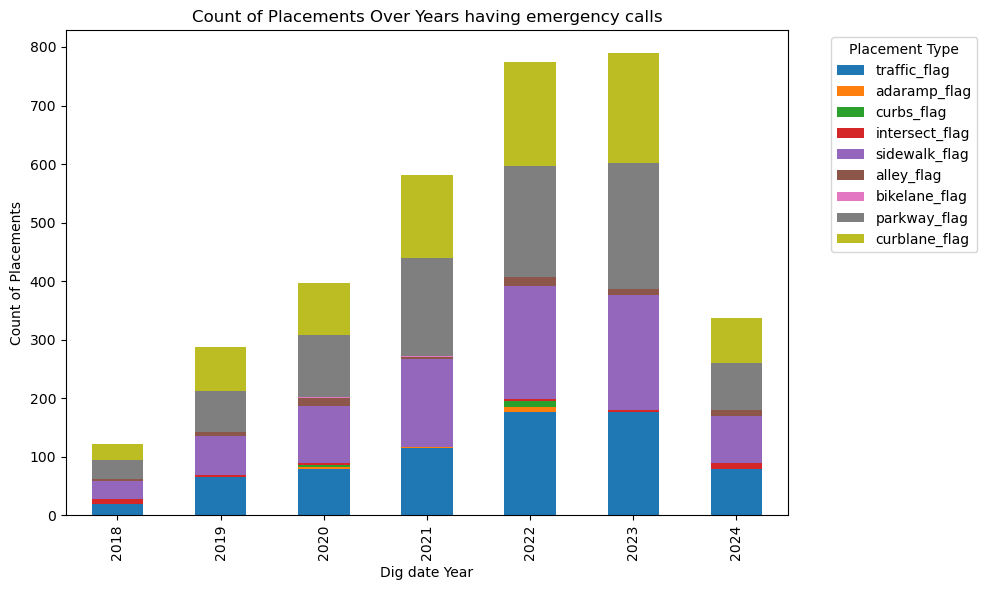

In [45]:
# Extracting relevant data
years = flag_counts_emer_fnl_02['Year']
placements = flag_counts_emer_fnl_02.iloc[:, 3:]  # Exclude index, Year, and EMERGENCY columns

# Plotting
plt.figure(figsize=(10, 6))
placements.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Placements Over Years having emergency calls')
plt.xlabel('Dig date Year')
plt.ylabel('Count of Placements')
plt.xticks(range(len(years)), years)  # Set x-axis labels as years
plt.legend(title='Placement Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend
plt.tight_layout()
plt.show()

Descriptive statistics for allotted time for excavation (expiry_date-dig_date)

In [52]:
df['REQUEST_DIG_DIFF'] = (df['DIGDATE'] - df['REQUESTDATE']).dt.days+1
df['DIG_EXPIRATION_DIFF'] = (df['EXPIRATIONDATE'] - df['DIGDATE']).dt.days+1

C:\Users\meetp\AppData\Local\Temp\ipykernel_16052\587101086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REQUEST_DIG_DIFF'] = (df['DIGDATE'] - df['REQUESTDATE']).dt.days+1
C:\Users\meetp\AppData\Local\Temp\ipykernel_16052\587101086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DIG_EXPIRATION_DIFF'] = (df['EXPIRATIONDATE'] - df['DIGDATE']).dt.days+1


In [53]:
df['DIG_EXPIRATION_DIFF'].describe()

count    926477.000000
mean         25.151929
std          19.438696
min           1.000000
25%          19.000000
50%          24.000000
75%          27.000000
max         397.000000
Name: DIG_EXPIRATION_DIFF, dtype: float64

In [54]:
df[df['DIG_EXPIRATION_DIFF']>30].count()

DIG_TICKET#            77652
PERMIT#                77652
REQUESTDATE            77652
EMERGENCY              77652
STNOFROM               77652
STNOTO                 77652
DIRECTION              77652
STNAME                 77652
SUFFIX                 77245
PLACEMENT              76801
DIGDATE                77652
EXPIRATIONDATE         77652
PRIMARYCONTACTFIRST        2
PRIMARYCONTACTLAST     77652
LATITUDE               77592
LONGITUDE              77592
REQUESTDATE_Year       77652
DIGDATE_Year           77652
REQUEST_DIG_DIFF       77652
DIG_EXPIRATION_DIFF    77652
traffic_flag           77652
adaramp_flag           77652
curbs_flag             77652
intersect_flag         77652
sidewalk_flag          77652
alley_flag             77652
bikelane_flag          77652
parkway_flag           77652
curblane_flag          77652
dtype: int64

In [55]:
df['REQUEST_DIG_DIFF'].describe()

count    926784.000000
mean          9.266250
std          20.739455
min           1.000000
25%           3.000000
50%           5.000000
75%           6.000000
max         743.000000
Name: REQUEST_DIG_DIFF, dtype: float64

Check top 10 companies that ordered permit in the entire dataset?

In [56]:
x1=df.groupby('PRIMARYCONTACTLAST')['PERMIT#'].count().sort_values(ascending=False).reset_index().head(10).rename(columns={'DIGDATE_Year': 'Year', 'PERMIT#': 'PERMIT_Count'})
x1

,PRIMARYCONTACTLAST,PERMIT_Count
0,DWM,108516
1,SEVEN-D CONSTRUCTION CO*,78006
2,Peoples Gas,62520
3,NPL CONSTRUCTION*,39960
4,"MEADE ELECTRIC CO., INC.*",38617
5,G & V CONST CO INC (SL),31554
6,"KS ENERGY SERVICES, LLC (OVERSIZE)(PARENT-ARTERA)",30205
7,SANCHEZ PAVING**,27486
8,CHICAGO CUT CONCRETE CUTTING *,25285
9,CHRISTY WEBBER & CO*,24435


Check top 10 companies that ordered permit on a yearly basis?

In [57]:
x2=df.groupby(['PRIMARYCONTACTLAST','DIGDATE_Year'])['PERMIT#'].count().sort_values(ascending=False).reset_index()
x2

,PRIMARYCONTACTLAST,DIGDATE_Year,PERMIT#
0,SEVEN-D CONSTRUCTION CO*,2023,19811
1,DWM,2023,19030
2,DWM,2019,18135
3,DWM,2018,18016
4,DWM,2022,15596
...,...,...,...
2499,STRUCTURES CONSTRUCTION LLC*,2024,1
2500,"HYDRO-EXCAVATING, INC",2023,1
2501,Haro,2021,1
2502,Hodur,2022,1


In [58]:
top_10_per_year = x2.groupby('DIGDATE_Year').apply(lambda group: group.nlargest(10, 'PERMIT#')).rename(columns={'DIGDATE_Year': 'Year'})
top_10_per_year

PRIMARYCONTACTLAST  Year  PERMIT#
DIGDATE_Year                                                            
2018         3                                        DWM  2018    18016
             8                                Peoples Gas  2018    12533
             12                         NPL CONSTRUCTION*  2018    10479
             13                  SEVEN-D CONSTRUCTION CO*  2018    10106
             19                MEADE ELECTRIC CO.,  INC.*  2018     7979
...                                                   ...   ...      ...
2024         111                              Peoples Gas  2024     2350
             147                      MILLER PIPELINE LLC  2024     1692
             168  SPEEDY GONZALEZ LANDSCAPING, INC. (SL)*  2024     1477
             182               MEADE ELECTRIC CO.,  INC.*  2024     1349
             186             JOHN BURNS CONSTRUCTION CO.*  2024     1318

[70 rows x 3 columns]

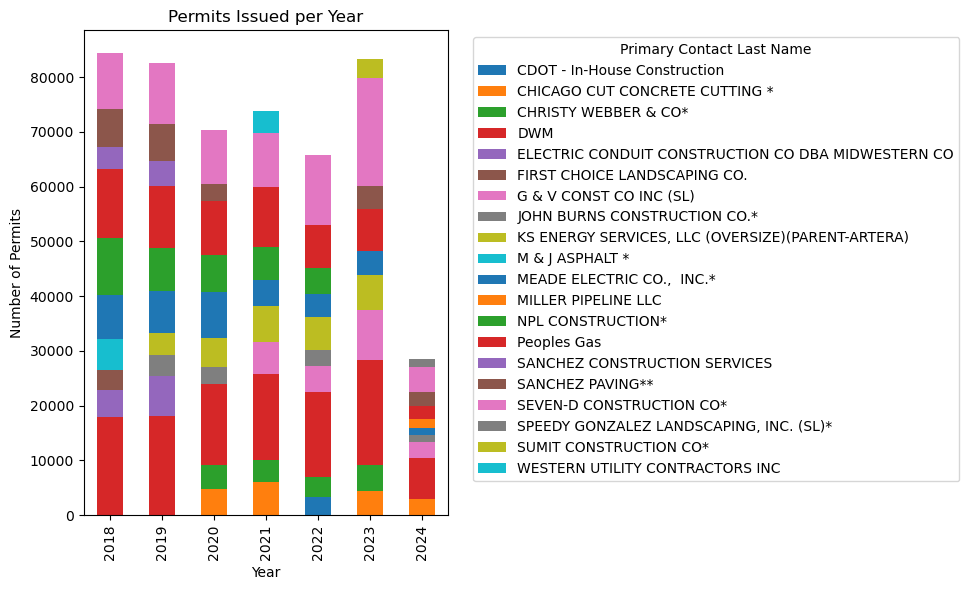

In [59]:
import matplotlib.pyplot as plt

# Pivot the DataFrame to have 'PRIMARYCONTACTLAST' as columns and 'Year' as index
pivot_df = top_10_per_year.pivot_table(index='Year', columns='PRIMARYCONTACTLAST', values='PERMIT#', aggfunc='sum')

# Create a stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.title('Permits Issued per Year')

# Move the legend outside the plot
plt.legend(title='Primary Contact Last Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


Check which companies have higher rate of emergency call on a yearly basis?

In [60]:
x5 = df.groupby(['PRIMARYCONTACTLAST', 'DIGDATE_Year', 'EMERGENCY'])['PERMIT#'].count().sort_values(ascending=False).reset_index()
x5_filtered = x5[x5['EMERGENCY'] == True]

In [61]:
top_10_per_year_er = x5_filtered.groupby('DIGDATE_Year').apply(lambda group: group.nlargest(10, 'PERMIT#')).rename(columns={'DIGDATE_Year': 'Year'})
top_10_per_year_er

PRIMARYCONTACTLAST  Year  EMERGENCY  \
DIGDATE_Year                                                                  
2018         1441                 BADGER DAYLIGHTING CORP*  2018       True   
             1639             CDOT - In-House Construction  2018       True   
             1717                         ALMIGHTY ROOTER*  2018       True   
             1868                      COSTELLO'S PLUMBING  2018       True   
             1883                                      DWM  2018       True   
...                                                    ...   ...        ...   
2024         2216  BRODERICK & SON PLUMBING & SEWERS CORP*  2024       True   
             2276                          OG PLUMBING LLC  2024       True   
             2322             CALUMET CITY PLUMBING CO INC  2024       True   
             2370            CHICAGO PLUMBING EXPERTS INC*  2024       True   
             2390                   RO PLUMBING & HEATING*  2024       True   

                   PERMIT#  
DIGDATE_Year                
2018         1441        8  
             1639        5  
             1717        5  
             1868        3  
             1883        3  
...                    ...  
2024         2216        2  
             2276        2  
             2322        1  
             2370        1  
             2390        1  

[70 rows x 4 columns]

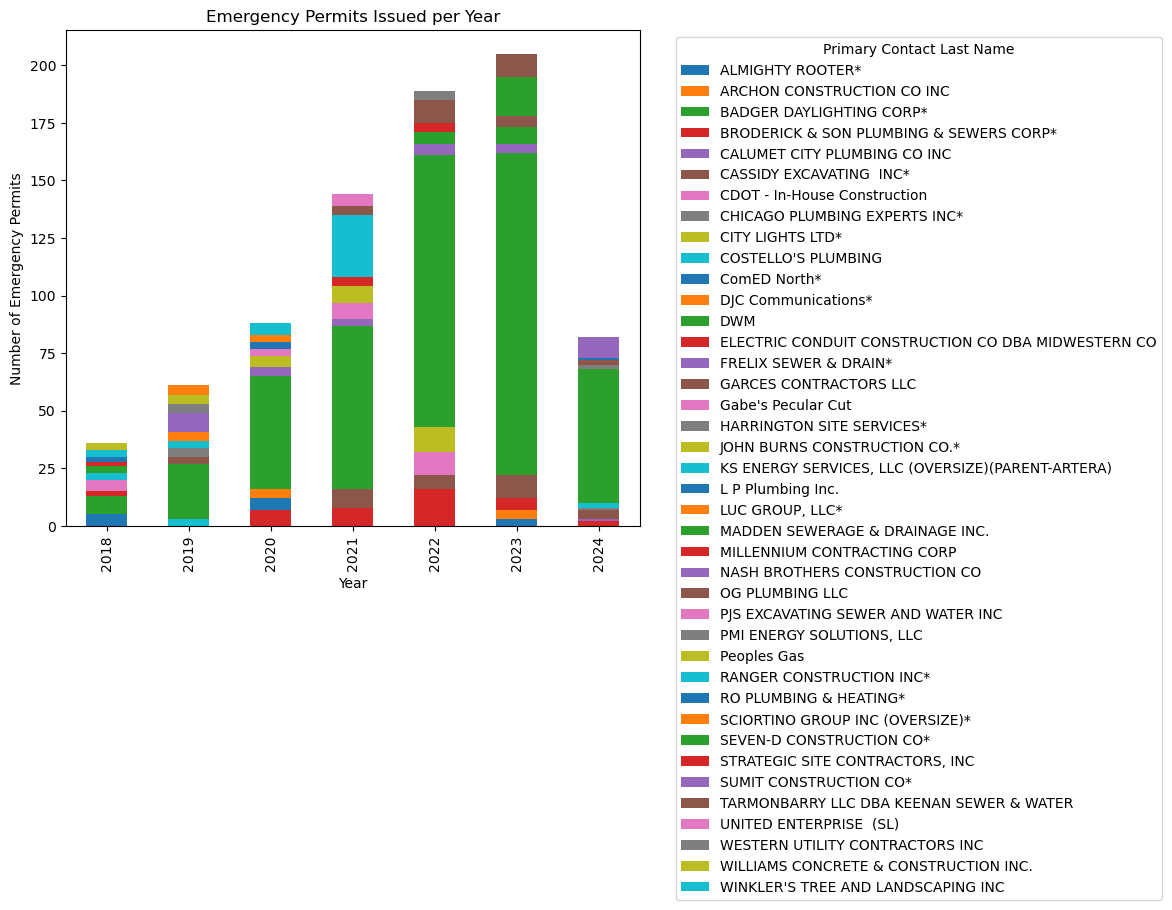

In [62]:
import matplotlib.pyplot as plt

# Define a larger figsize
fig, ax = plt.subplots(figsize=(12, 8))

# Pivot the DataFrame to have 'PRIMARYCONTACTLAST' as columns and 'Year' as index
pivot_df = top_10_per_year_er.pivot_table(index='Year', columns='PRIMARYCONTACTLAST', values='PERMIT#', aggfunc='sum')

# Create a stacked bar plot
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Emergency Permits')
plt.title('Emergency Permits Issued per Year')

# Move the legend outside the plot
plt.legend(title='Primary Contact Last Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


Relationship between month and emergency

In [1]:
import duckdb

In [63]:
df.head(2)

,DIG_TICKET#,PERMIT#,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,...,DIG_EXPIRATION_DIFF,traffic_flag,adaramp_flag,curbs_flag,intersect_flag,sidewalk_flag,alley_flag,bikelane_flag,parkway_flag,curblane_flag
1,600391391,DOT901961,2018-01-01,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",...,27.0,1,0,0,0,1,0,0,1,1
3,600391393,DOT901964,2018-01-01,False,1536.0,1536.0,N,CAMPBELL,AVE,PARKWAY,...,27.0,0,0,0,0,0,0,0,1,0


Check streetname with highest excavation over the years

In [64]:
df.rename(columns={'PERMIT#': 'PERMIT'}, inplace=True)
df_a=duckdb.query("SELECT distinct stname,DIGDATE_Year,COUNT(distinct PERMIT) as permit_cnt FROM df group by stname,DIGDATE_Year").to_df()
df_a

C:\Users\meetp\AppData\Local\Temp\ipykernel_16052\3782952616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'PERMIT#': 'PERMIT'}, inplace=True)


,STNAME,DIGDATE_Year,permit_cnt
0,VINCENNES,2020,94
1,WELLS,2020,125
2,OHIO,2020,136
3,FULTON MARKET,2020,32
4,LEXINGTON,2020,73
...,...,...,...
7816,LEE,2020,1
7817,WILLIAMS,2020,1
7818,SEIPP,2022,3
7819,LATHAM,2023,1


In [65]:
df_b=duckdb.query("SELECT distinct *, dense_rank() over (partition by DIGDATE_Year order by permit_cnt) as rnk_01 FROM df_a").to_df()
df_c = df_b[df_b['rnk_01'].between(1, 10)]
df_c

,STNAME,DIGDATE_Year,permit_cnt,rnk_01
0,CONSERVATORY,2019,1,1
1,WILLIAMS,2019,1,1
2,RESERVE,2019,1,1
3,MANNHEIM,2019,1,1
4,BEAUBIEN,2019,1,1
...,...,...,...,...
7745,EDGEWATER,2024,9,9
7746,MCLEAN,2024,10,10
7747,78TH,2024,10,10
7748,30TH,2024,10,10


C:\Users\meetp\AppData\Local\Temp\ipykernel_16052\873821156.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


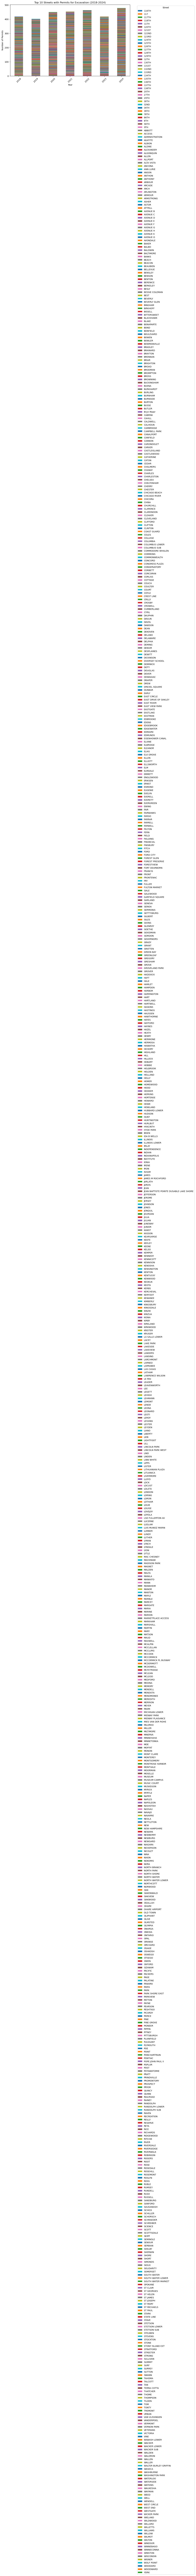

In [66]:
import matplotlib.pyplot as plt

# Assuming df_c contains the required data

# Grouping by Year and Street to get the count of permits for each street in each year
grouped_df = df_c.groupby(['DIGDATE_Year', 'STNAME']).size().unstack().fillna(0)

# Plotting stacked bar graph
grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Top 10 Streets with Permits for Excavation (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.xticks(rotation=45)
plt.legend(title='Street', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [67]:
df_d=duckdb.query("SELECT distinct stname,COUNT(distinct PERMIT) as permit_cnt FROM df group by stname").to_df()
df_e=df_d.sort_values(by='permit_cnt', ascending=False).head(10)
df_e

,STNAME,permit_cnt
3,WESTERN,2797
813,ASHLAND,2699
997,HALSTED,2092
1210,KEDZIE,2083
801,DAMEN,2059
109,PAULINA,1967
364,CALIFORNIA,1965
623,MICHIGAN,1773
859,CAMPBELL,1756
1044,OAKLEY,1692


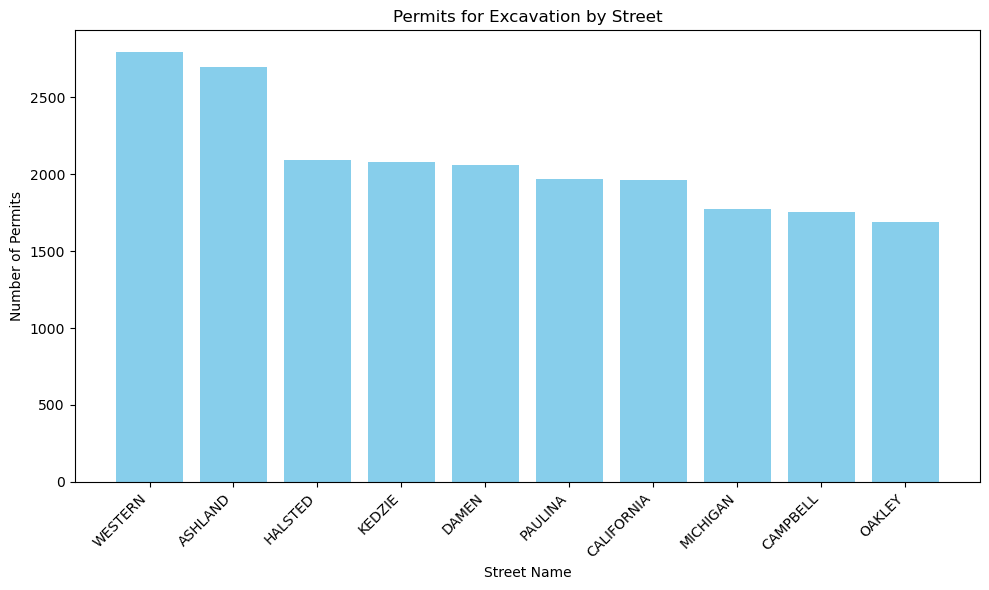

In [68]:
# Extracting street names and permit counts
street_names = df_e['STNAME']
permit_counts = df_e['permit_cnt']

# Plotting bar graph
plt.figure(figsize=(10, 6))
plt.bar(street_names, permit_counts, color='skyblue')

# Adding labels and title
plt.title('Permits for Excavation by Street')
plt.xlabel('Street Name')
plt.ylabel('Number of Permits')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [69]:
df['digdate_month']=df['DIGDATE'].dt.month
df['digdate_month_year'] = df['DIGDATE'].dt.strftime('%B %Y')

C:\Users\meetp\AppData\Local\Temp\ipykernel_16052\4002298074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['digdate_month']=df['DIGDATE'].dt.month
C:\Users\meetp\AppData\Local\Temp\ipykernel_16052\4002298074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['digdate_month_year'] = df['DIGDATE'].dt.strftime('%B %Y')


In [70]:
df.head(2)

,DIG_TICKET#,PERMIT,REQUESTDATE,EMERGENCY,STNOFROM,STNOTO,DIRECTION,STNAME,SUFFIX,PLACEMENT,...,adaramp_flag,curbs_flag,intersect_flag,sidewalk_flag,alley_flag,bikelane_flag,parkway_flag,curblane_flag,digdate_month,digdate_month_year
1,600391391,DOT901961,2018-01-01,False,1111.0,1111.0,N,CHERRY,AVE,"CURBLANE,PARKWAY,SIDEWALK,TRAFFIC",...,0,0,0,1,0,0,1,1,1,January 2018
3,600391393,DOT901964,2018-01-01,False,1536.0,1536.0,N,CAMPBELL,AVE,PARKWAY,...,0,0,0,0,0,0,1,0,1,January 2018


In [71]:
df_f=duckdb.query("SELECT distinct digdate_month_year,COUNT(EMERGENCY) as ER_cnt FROM df WHERE EMERGENCY=='True' group by digdate_month_year").to_df()
df_f

,digdate_month_year,ER_cnt
0,June 2020,8
1,March 2024,26
2,June 2019,13
3,March 2018,4
4,June 2018,1
...,...,...
71,May 2023,14
72,November 2023,19
73,June 2022,18
74,January 2021,9


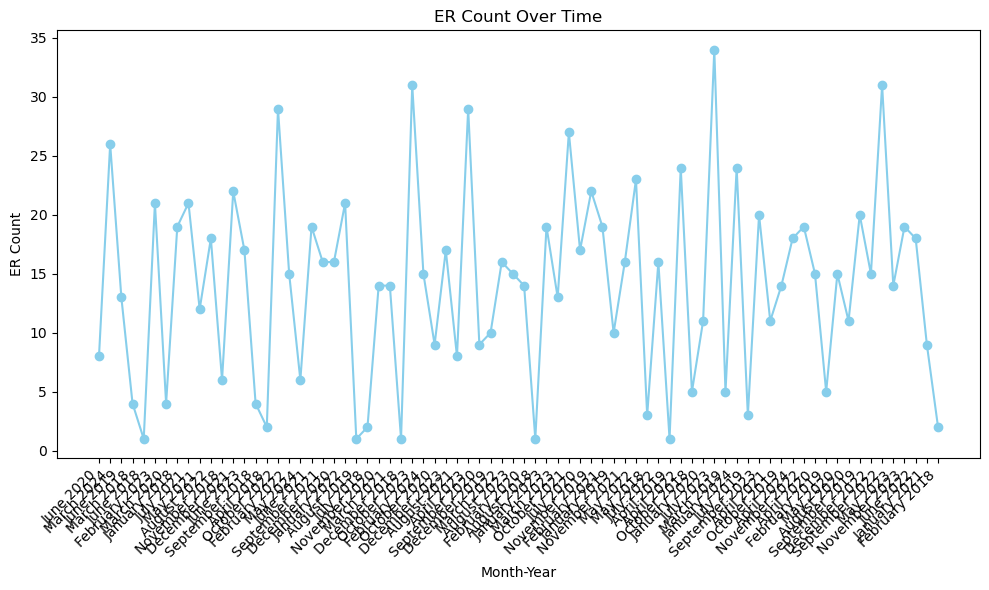

In [72]:
# Plotting line graph
plt.figure(figsize=(10, 6))
plt.plot(df_f['digdate_month_year'], df_f['ER_cnt'], marker='o', color='skyblue', linestyle='-')

# Adding labels and title
plt.title('ER Count Over Time')
plt.xlabel('Month-Year')
plt.ylabel('ER Count')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [73]:
df_g=duckdb.query("SELECT distinct digdate_month,COUNT(EMERGENCY) as ER_cnt FROM df WHERE EMERGENCY=='True' group by digdate_month").to_df()
df_g

,digdate_month,ER_cnt
0,6,76
1,5,73
2,1,113
3,3,82
4,8,54
5,2,91
6,7,93
7,9,100
8,11,96
9,10,115


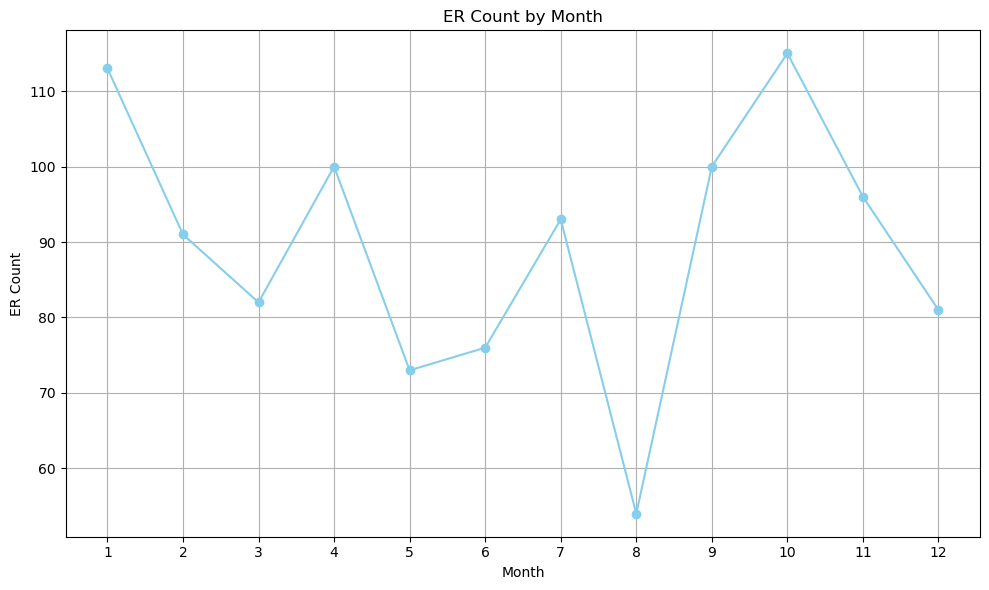

In [74]:
# Sorting the DataFrame by month
df_g_sorted = df_g.sort_values('digdate_month')

# Plotting line graph with markers
plt.figure(figsize=(10, 6))
plt.plot(df_g_sorted['digdate_month'], df_g_sorted['ER_cnt'], marker='o', color='skyblue', linestyle='-')

# Adding labels and title
plt.title('ER Count by Month')
plt.xlabel('Month')
plt.ylabel('ER Count')
plt.xticks(range(1, 13))  # Setting x-ticks to represent all months
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [75]:
df_h=duckdb.query("SELECT distinct DIGDATE_year,digdate_month,COUNT(EMERGENCY) as ER_cnt FROM df WHERE EMERGENCY=='True' group by DIGDATE_year,digdate_month").to_df()
df_h

,DIGDATE_Year,digdate_month,ER_cnt
0,2018,1,19
1,2023,11,19
2,2020,11,14
3,2022,6,18
4,2023,5,14
...,...,...,...
71,2022,3,16
72,2019,11,22
73,2021,8,8
74,2022,11,19


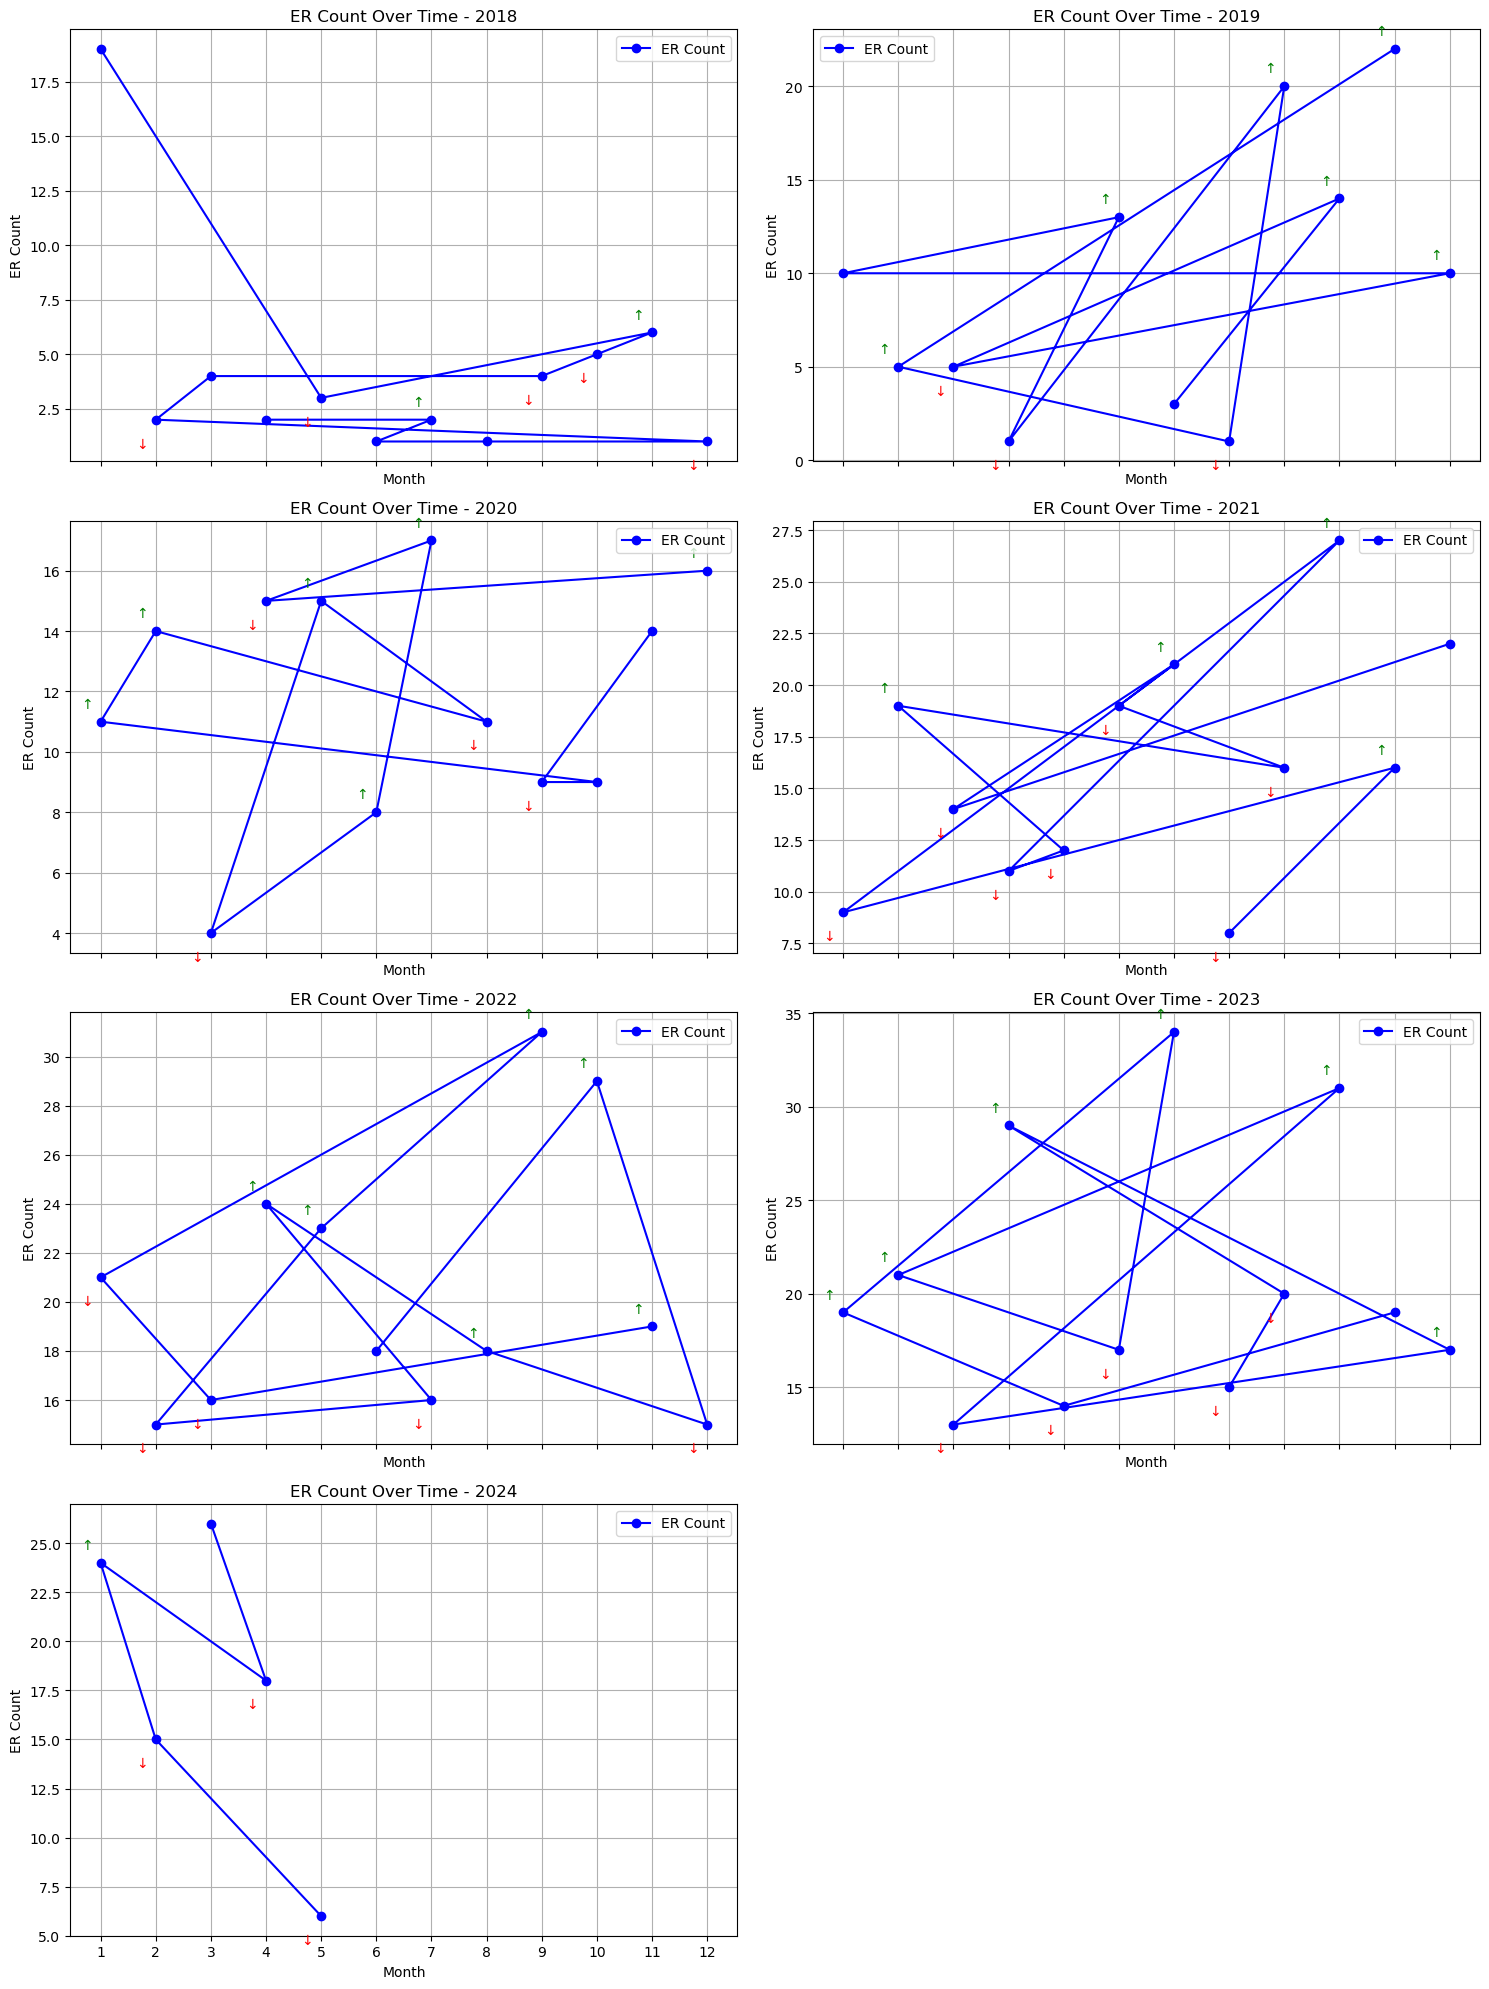

In [76]:
import matplotlib.pyplot as plt

# Assuming df_h contains the required data

# Grouping data by year
grouped_data = df_h.groupby('DIGDATE_Year')

# Determining the number of subplots based on the number of unique years
num_subplots = len(grouped_data)
cols = 2  # Number of columns in the subplot grid

# Calculating the number of rows needed based on the number of subplots
rows = -(-num_subplots // cols)  # Ceiling division to ensure all subplots are accommodated

# Creating subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=True)

# Flattening axes for easier iteration
axes = axes.flatten()

# Plotting ER count for each year with increase and decrease arrows
for i, (year, group) in enumerate(grouped_data):
    ax = axes[i]
    ax.plot(group['digdate_month'], group['ER_cnt'], marker='o', label='ER Count', color='blue')
    ax.set_title(f'ER Count Over Time - {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('ER Count')
    ax.set_xticks(range(1, 13))
    ax.grid(True)
    
    # Annotating increase and decrease arrows
    for j in range(1, len(group)):
        if group['ER_cnt'].iloc[j] > group['ER_cnt'].iloc[j - 1]:
            ax.annotate('↑', xy=(group['digdate_month'].iloc[j], group['ER_cnt'].iloc[j]), xytext=(-10, 10), textcoords='offset points', ha='center', color='green')
        elif group['ER_cnt'].iloc[j] < group['ER_cnt'].iloc[j - 1]:
            ax.annotate('↓', xy=(group['digdate_month'].iloc[j], group['ER_cnt'].iloc[j]), xytext=(-10, -20), textcoords='offset points', ha='center', color='red')
    
    ax.legend()

# Removing unused subplots if needed
for i in range(num_subplots, len(axes)):
    fig.delaxes(axes[i])

# Adjusting layout
plt.tight_layout()

# Show plot
plt.show()

In [77]:
df['reqdate_month']=df['REQUESTDATE'].dt.month

C:\Users\meetp\AppData\Local\Temp\ipykernel_16052\904218761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reqdate_month']=df['REQUESTDATE'].dt.month


In [78]:
df_i=duckdb.query("SELECT distinct reqdate_month,COUNT(EMERGENCY) as ER_cnt FROM df WHERE EMERGENCY=='True' group by reqdate_month").to_df()
df_i

,reqdate_month,ER_cnt
0,10,115
1,7,93
2,3,81
3,6,76
4,11,98
5,2,93
6,1,113
7,5,73
8,9,101
9,4,99


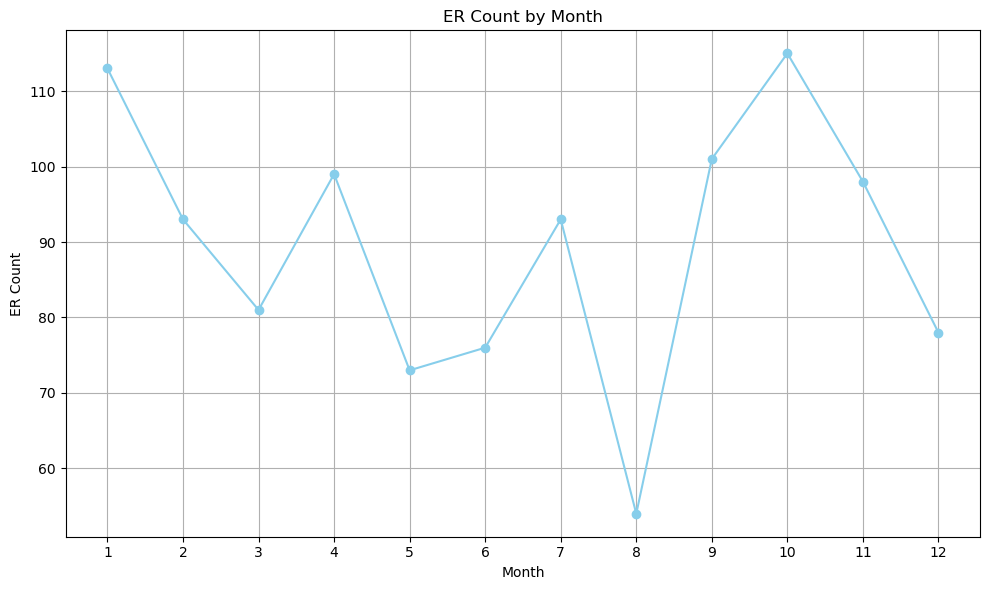

In [79]:
# Sorting the DataFrame by month
df_i_sorted = df_i.sort_values('reqdate_month')

# Plotting line graph with markers
plt.figure(figsize=(10, 6))
plt.plot(df_i_sorted['reqdate_month'], df_i_sorted['ER_cnt'], marker='o', color='skyblue', linestyle='-')

# Adding labels and title
plt.title('ER Count by Month')
plt.xlabel('Month')
plt.ylabel('ER Count')
plt.xticks(range(1, 13))  # Setting x-ticks to represent all months
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [80]:
df_j=duckdb.query("SELECT distinct REQUESTDATE_year,reqdate_month,COUNT(EMERGENCY) as ER_cnt FROM df WHERE EMERGENCY=='True' group by REQUESTDATE_year,reqdate_month").to_df()
df_j

,REQUESTDATE_Year,reqdate_month,ER_cnt
0,2023,3,11
1,2020,1,11
2,2022,10,29
3,2019,11,24
4,2019,10,14
...,...,...,...
71,2018,11,6
72,2018,1,19
73,2021,12,22
74,2018,5,3


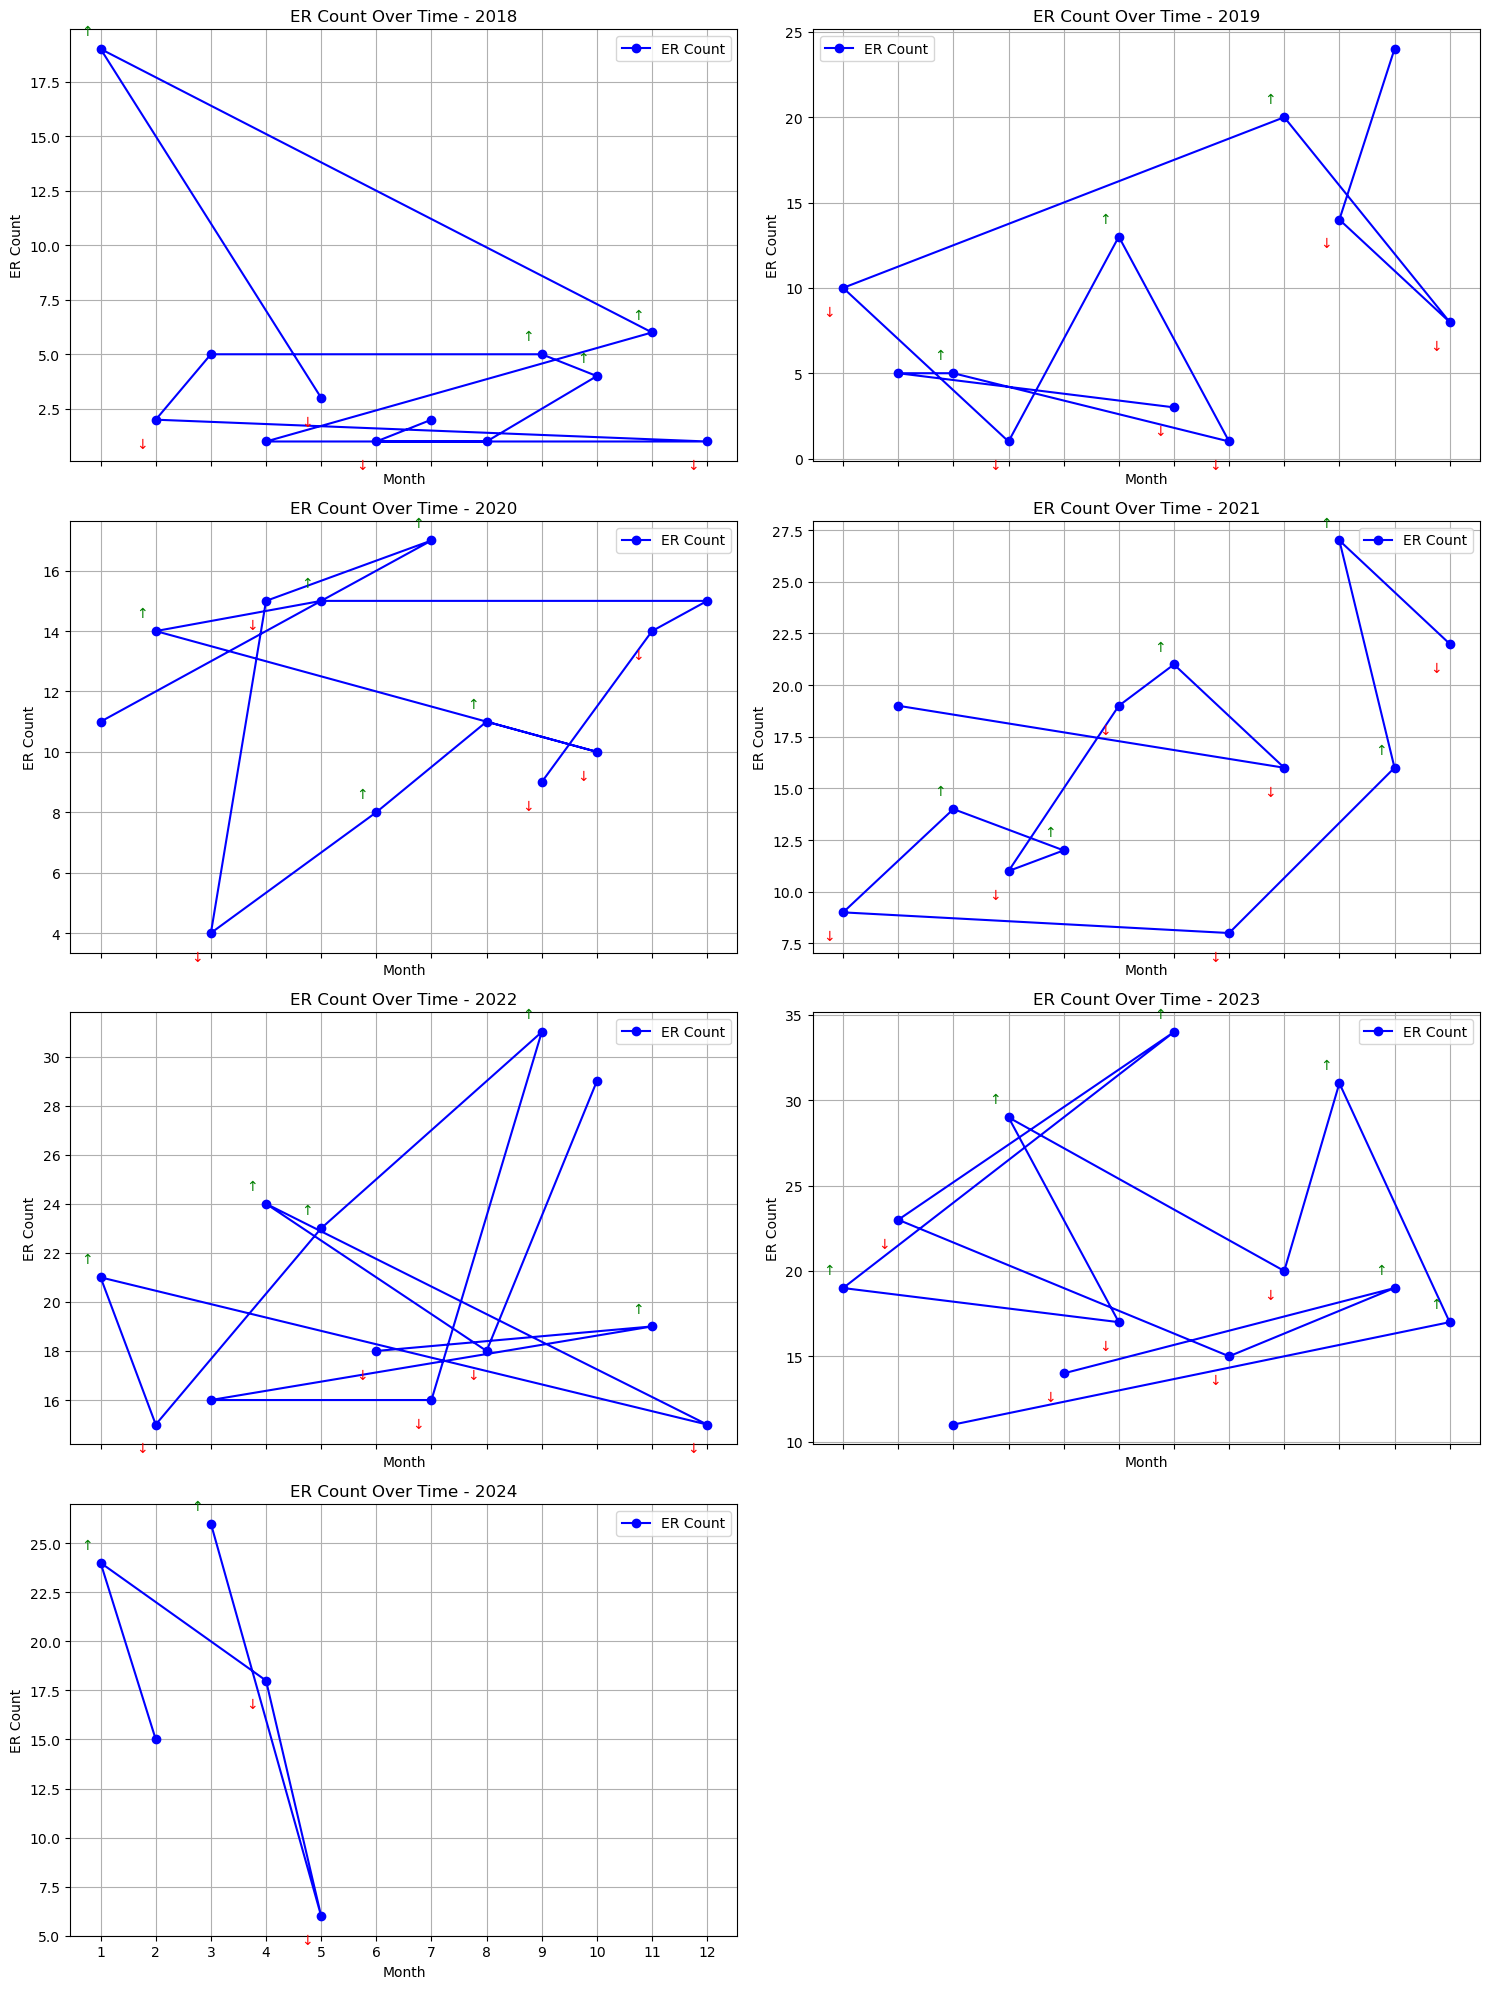

In [81]:
import matplotlib.pyplot as plt

# Assuming df_h contains the required data

# Grouping data by year
grouped_data = df_j.groupby('REQUESTDATE_Year')

# Determining the number of subplots based on the number of unique years
num_subplots = len(grouped_data)
cols = 2  # Number of columns in the subplot grid

# Calculating the number of rows needed based on the number of subplots
rows = -(-num_subplots // cols)  # Ceiling division to ensure all subplots are accommodated

# Creating subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=True)

# Flattening axes for easier iteration
axes = axes.flatten()

# Plotting ER count for each year with increase and decrease arrows
for i, (year, group) in enumerate(grouped_data):
    ax = axes[i]
    ax.plot(group['reqdate_month'], group['ER_cnt'], marker='o', label='ER Count', color='blue')
    ax.set_title(f'ER Count Over Time - {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('ER Count')
    ax.set_xticks(range(1, 13))
    ax.grid(True)
    
    # Annotating increase and decrease arrowsF
    for j in range(1, len(group)):
        if group['ER_cnt'].iloc[j] > group['ER_cnt'].iloc[j - 1]:
            ax.annotate('↑', xy=(group['reqdate_month'].iloc[j], group['ER_cnt'].iloc[j]), xytext=(-10, 10), textcoords='offset points', ha='center', color='green')
        elif group['ER_cnt'].iloc[j] < group['ER_cnt'].iloc[j - 1]:
            ax.annotate('↓', xy=(group['reqdate_month'].iloc[j], group['ER_cnt'].iloc[j]), xytext=(-10, -20), textcoords='offset points', ha='center', color='red')
    
    ax.legend()

# Removing unused subplots if needed
for i in range(num_subplots, len(axes)):
    fig.delaxes(axes[i])

# Adjusting layout
plt.tight_layout()

# Show plot
plt.show()

In [83]:
import pandas as pd

# Given data
data = {
    'Year': [2024, 2020, 2022, 2021, 2019, 2018, 2023],
    'Total Excavations': [48486, 127121, 134108, 147449, 152563, 152953, 164104]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Given parameters
damage_rate_2020 = 2.34 / 1000  # Damage rate in 2020 per excavation
yearly_increase = 0.05  # 5% year-over-year increase
average_repair_cost = 10000  # Average repair cost per damage

# Calculate damages and repair costs
df['Damages'] = df['Total Excavations'] * (damage_rate_2020 * (1 + yearly_increase) ** (df['Year'] - 2020))
df['Repair Cost'] = df['Damages'] * average_repair_cost

# Calculate overall damage rate and repair cost
overall_damages = df['Damages'].sum()
overall_excavations = df['Total Excavations'].sum()
overall_damage_rate = overall_damages / overall_excavations * 1000
overall_repair_cost = df['Repair Cost'].sum()

# Display results
print("Yearly Damage Rate and Repair Cost:")
print(df[['Year', 'Damages', 'Repair Cost']])
print("\nOverall Damage Rate:", overall_damage_rate)
print("Overall Repair Cost:", overall_repair_cost)


Yearly Damage Rate and Repair Cost:
   Year     Damages   Repair Cost
0  2024  137.907984  1.379080e+06
1  2020  297.463140  2.974631e+06
2  2022  345.978524  3.459785e+06
3  2021  362.282193  3.622822e+06
4  2019  339.997543  3.399975e+06
5  2018  324.634939  3.246349e+06
6  2023  444.531890  4.445319e+06

Overall Damage Rate: 2.43076726872756
Overall Repair Cost: 22527962.123804033


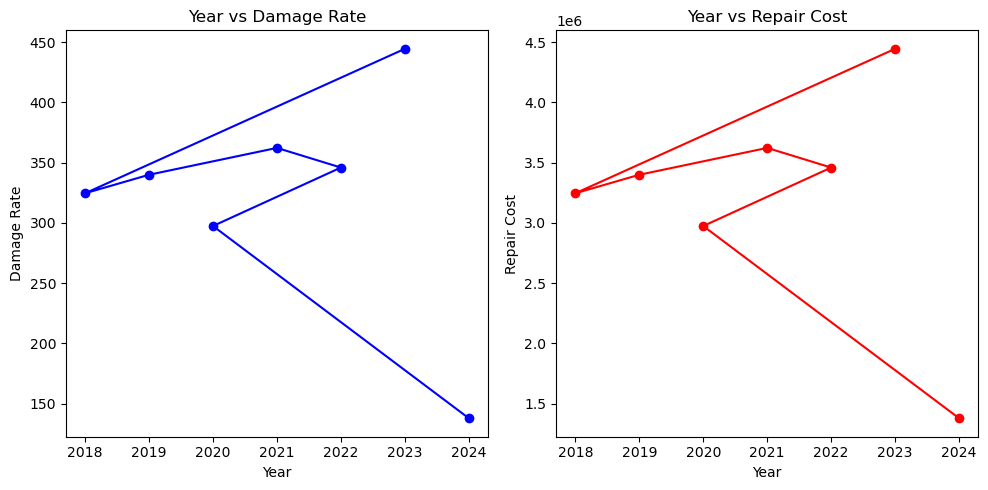

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Year': [2024, 2020, 2022, 2021, 2019, 2018, 2023],
    'Total Excavations': [48486, 127121, 134108, 147449, 152563, 152953, 164104]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Given parameters
damage_rate_2020 = 2.34 / 1000  # Damage rate in 2020 per excavation
yearly_increase = 0.05  # 5% year-over-year increase
average_repair_cost = 10000  # Average repair cost per damage

# Calculate damages and repair costs
df['Damages'] = df['Total Excavations'] * (damage_rate_2020 * (1 + yearly_increase) ** (df['Year'] - 2020))
df['Repair Cost'] = df['Damages'] * average_repair_cost

# Plotting
plt.figure(figsize=(10, 5))

# Year vs Damage Rate
plt.subplot(1, 2, 1)
plt.plot(df['Year'], df['Damages'], marker='o', color='b')
plt.title('Year vs Damage Rate')
plt.xlabel('Year')
plt.ylabel('Damage Rate')

# Year vs Repair Cost
plt.subplot(1, 2, 2)
plt.plot(df['Year'], df['Repair Cost'], marker='o', color='r')
plt.title('Year vs Repair Cost')
plt.xlabel('Year')
plt.ylabel('Repair Cost')

plt.tight_layout()
plt.show()
